<a href="https://colab.research.google.com/github/MariuszGrecki/Machine_learning_tutorial/blob/main/supervised/01_basics/02_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Braki Danych - zdarza się w tabelach null lub Nan mamy kilka mozliwości

1) usuniecie rekordów z brakami

2) uzupełnienie braków stałą wartością (średnia, mediana)

3) wytrenowanie modelu w celu uzupełnienia braków

4) Zastosowanie interpolacji (szeregi czasowe) - stara się przewidzieć co może się stać lub uzupełnia braki danych ostatnio napotkaną wartością

5) Dodanie nowej kategorii, np. 'brak' (zmienne kategoryczne)

Ważne! W celu uzpełnienia braków danych (np. średnia, mediana) obliczeń dokonujemy na zbiorze treningowym. Zapobiega to, 'wyciekowi informacji' ze zbioru testowego.

In [1]:
import numpy as np
import pandas as pd
import sklearn

sklearn.__version__

'1.2.2'

In [2]:
#wygenerowanie danych

data = {
    'size': ['XL', 'L', 'M', np.nan, 'M', 'M'],
    'color' : ['red', 'green', 'blue', 'green', 'red', 'green'],
    'gender' : ['female', 'male', np.nan, 'female', 'female', 'male'],
    'price': [199.0, 89.0, np.nan, 129.0, 79.0, 89.0],
    'weight': [500, 450, 300, np.nan, 410, np.nan],
    'bought': ['yes', 'no', 'yes', 'no', 'yes', 'no']
}

df_raw = pd.DataFrame(data=data)
df_raw

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [3]:
#utworzenie kopii danych
df = df_raw.copy()
#info zwraca dane które nie sa nullami
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   size    5 non-null      object 
 1   color   6 non-null      object 
 2   gender  5 non-null      object 
 3   price   5 non-null      float64
 4   weight  4 non-null      float64
 5   bought  6 non-null      object 
dtypes: float64(2), object(4)
memory usage: 416.0+ bytes


In [4]:
#sprawdzenie braków
df.isnull()

,size,color,gender,price,weight,bought
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,True,True,False,False
3,True,False,False,False,True,False
4,False,False,False,False,False,False
5,False,False,False,False,True,False


In [5]:
#sumowanie braków pokazanie ich ilości
df.isnull().sum()

size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [6]:
#łączna ilość braków danych
df.isnull().sum().sum()

5

In [7]:
#procentowy brak danych dla każdej zmiennej
df.isnull().sum() / len(df)

size      0.166667
color     0.000000
gender    0.166667
price     0.166667
weight    0.333333
bought    0.000000
dtype: float64

In [8]:
#Uzupełniania braków przez klasę SimpleImputer

from sklearn.impute import SimpleImputer

#stretegy:
 #mean - brakujące wartości zostaną zastąpione średnią z każdej kolumny. Może być używane tylko z danymi numerycznymi
 #median - brakujące wartości zostaną zastąpione medianą z każdej kolumny. Może być używane tylko z danymi numerycznymi. Mediana uporządkowuje zbiór danych i następnie wybiera środkową [3,1,4,1,5,9] => [1,2,3,4,5,6] => (3+4) / 2 = 3.5
 #most_frequent - brakujące wartości zostaną zastąpione najczęściej występującą wartością w każdej kolumnie. Może być używane z danymi tekstowymi lub numerycznymi. Jeśli jest więcej niż jedna taka wartość, zwracana jest tylko najmniejsza z nich
 #constant - to brakujące wartości zostaną zastąpione wartością fill_value. Może być używane z danymi tekstowymi lub numerycznymi
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(df[['weight']])

SimpleImputer()

In [9]:
#wartość która zostanie uzupełniona w miejsca braków
imputer.statistics_

array([415.])

In [10]:
imputer.transform(df[['weight']])

array([[500.],
       [450.],
       [300.],
       [415.],
       [410.],
       [415.]])

In [11]:
#trwałe przypisanie
df['weight'] = imputer.transform(df[['weight']])
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,415.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,415.0,no


In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=99.0)
imputer.fit_transform(df[['price']])

array([[199.],
       [ 89.],
       [ 99.],
       [129.],
       [ 79.],
       [ 89.]])

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer.fit_transform(df[['size']])

array([['XL'],
       ['L'],
       ['M'],
       ['M'],
       ['M'],
       ['M']], dtype=object)

In [17]:
df = df_raw.copy()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [18]:
df.isnull().sum()


size      1
color     0
gender    1
price     1
weight    2
bought    0
dtype: int64

In [19]:
#zwracanie maski logicznej konkretnej kolumny
pd.isnull(df['weight'])

0    False
1    False
2    False
3     True
4    False
5     True
Name: weight, dtype: bool

In [20]:
#zwraca rekordy gdzie weight is NAN
df[pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
3,NaN,green,female,129.0,NaN,no
5,M,green,male,89.0,NaN,no


In [21]:
#zwraca wszyskie indeksy gdzie weight is not NAN
df[~pd.isnull(df['weight'])]

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
4,M,red,female,79.0,410.0,yes


In [22]:
#dla kolumny weight jezzeli jest uzupełniona zwraca true inaczej zwróci false
pd.notnull(df['weight'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: weight, dtype: bool

In [23]:
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,NaN,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [24]:
#metoda fillna uzupełnia automatycznie wszystkie braki danych dana wartością
df.fillna(value='brak')

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,brak,brak,300.0,yes
3,brak,green,female,129.0,brak,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,brak,no


In [26]:
df.fillna(value=0.0)

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,0.0,0.0,300.0,yes
3,0.0,green,female,129.0,0.0,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,0.0,no


In [27]:
#metoda fillna może być równiez wykorzystywana na konkretnych kolumnach
df['size'].fillna(value="L", inplace=True)
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
2,M,blue,NaN,NaN,300.0,yes
3,L,green,female,129.0,NaN,no
4,M,red,female,79.0,410.0,yes
5,M,green,male,89.0,NaN,no


In [28]:
#wypisuje wszystkie rekordy dla których nie występuje brak danych , mozna tez wstawiać ilośc elementów
df.dropna()

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


In [29]:
df = df.dropna()
df

,size,color,gender,price,weight,bought
0,XL,red,female,199.0,500.0,yes
1,L,green,male,89.0,450.0,no
4,M,red,female,79.0,410.0,yes


Braki danych w szeregach czasowych

In [33]:
data = {'price': [108, 109, 110, 110, 109, np.nan, np.nan, 112, 111, 111]}
date_range = pd.date_range(start='01-01-2020 09:00', end='01-01-2020 18:00', periods=10)

df = pd.DataFrame(data=data, index=date_range)
df

,price
2020-01-01 09:00:00,108.0
2020-01-01 10:00:00,109.0
2020-01-01 11:00:00,110.0
2020-01-01 12:00:00,110.0
2020-01-01 13:00:00,109.0
2020-01-01 14:00:00,NaN
2020-01-01 15:00:00,NaN
2020-01-01 16:00:00,112.0
2020-01-01 17:00:00,111.0
2020-01-01 18:00:00,111.0


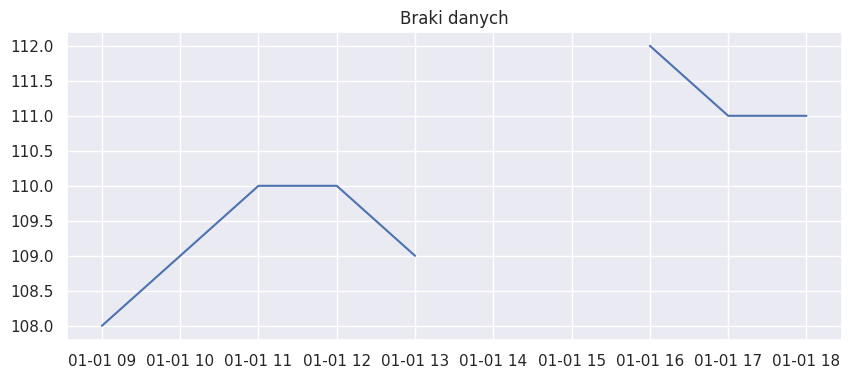

In [34]:
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt
import seaborn as sns
register_matplotlib_converters()
sns.set()

plt.figure(figsize=(10,4))
plt.title('Braki danych')
_ = plt.plot(df.price)

In [35]:
import plotly.express as px

df_plotly = df.reset_index()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

In [36]:
#usuniębie braków
df_plotly = df_plotly.dropna()
px.line(df_plotly, 'index', 'price', width=600, height=400, title='Szeregi czasowe - braki danych')

In [39]:
#wypełnienie braków stałą wartością 0
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(0)
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe -braki danych - wstawienie 0')

In [40]:
#wypełnienie braków średnią
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(df_plotly['price'].mean())
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - uzupełnianie średnią')

In [41]:
#zastosowanie interpolacji
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].interpolate()
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - interpolacja')

In [43]:
#zastosowanie forwardfill - ostatnią wartością
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='ffill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - forwardfill')

In [44]:
#zastosowanie backwardfill - następną wartością
df_plotly = df.reset_index()
df_plotly['price_fill'] = df_plotly['price'].fillna(method='bfill')
px.line(df_plotly, 'index', 'price_fill', width=600, height=400, title='Szeregi czasowe - braki danych - forwardfill')